In [1]:
import random

In [7]:
# idée : utiliser matrice d'adjacence et vérifier connexité
# vérifier la minimalité d'un labyrinthe en calculant l'absence de cycles
# Modified version dfs from starting point, not insert neighbor, we take the set of neighbors and randomly insert into stack

# TO-DO

<fieldset>
  <legend>A faire pour le 08/04/2024</legend>
    
  <div>
    <input type="checkbox" id="cpp" name="cpp" <!--checked<! />
      <label for="a"><b>Implémentation en C++ pour plus d'efficacité</b></label>
  </div>
  <div>
    <input type="checkbox" id="a" name="a" <!--checked<! />
    <label for="a">Implémenter un générateur de labyrinthes avec 2nm - n - m + 1 murs</label>
  </div>

  <div>
    <input type="checkbox" id="b" name="b" />
    <label for="b">Faire de la génération en masse de labyrinthes pour pouvoir faire du calcul statistique</label>
  </div>
    
  <div>
    <input type="checkbox" id="c" name="c" />
    <label for="c">Tenter d'optimiser la génération de pseudolabyrinthes connexes</label>
  </div>
</fieldset>

# différentes manières de représenter un graphe : 

## Matrice d'adjacence

<div style="text-align: center;">
  <img src="media/f3pxlcah.png" alt="matrice d'adjacence" style="max-width: 100%;">
</div>

# Liste d'adjacence

dictionnaire {sommet : sommets liés}

In [102]:
import random

class GraphLabyrinth:
    def __init__(self, n, m):
        self.n = n
        self.m = m
        self.graph = {} # liste d'adjacence
        self.grille()

    def grille(self):
        for i in range(self.n):
            for j in range(self.m):
                node = (i, j)
                self.graph[node] = []
                if i > 0:
                    self.graph[node].append((i-1, j)) 
                if i < self.n - 1:
                    self.graph[node].append((i+1, j))
                if j > 0:
                    self.graph[node].append((i, j-1))
                if j < self.m - 1:
                    self.graph[node].append((i, j+1))
    def afficher_graphe(self):
        """ FONCTION A OPTIMISER """
        # un point pour chaque noeud
        points = [point2d((j, i), size=10, color='blue') for i in range(self.n) for j in range(self.m)]

        # une ligne pour chaque mur
        lines = []
        for node, neighbors in self.graph.items():
            i, j = node
            for neighbor in neighbors:
                ni, nj = neighbor
                lines.append(line2d([(j, i), (nj, ni)], color='green', thickness=2))
        return sum(points) + sum(lines)
    # Vérifier si l'implémentation récursive du dfs est plus rapide
    def est_connexe(self):
        marked = {node: False for node in self.graph} # génération du dictionnaire de marquage des visites
        def DFS(node):
            marked[node] = True
            for neighbor in self.graph[node]:
                if marked[neighbor] == False:
                    DFS(neighbor)
        DFS((0,0))
        return all(marked.values())
    def deconnecte(self, node1, node2):
        """
        Cette fonction vérifie que le sommet de départ et le sommet d'arrivée sont bien liés, pour ensuite les déconnecter
        args :
            depart, arrivéee : sommets que l'on veut débrancher
        returns : 
            booléen vrai si action réussie, sinon faux
        """
        a, b = False, False
        if node2 in self.graph[node1]:
            self.graph[node1].remove(node2)
            a = True
        if node1 in self.graph[node2]:
            self.graph[node2].remove(node1)
            b = True
        return (a and b)
    def connecte(self, node1, node2):
        """
        crée une liaison entre deux sommets, suppose que nos deux sommets sont adjacents (risqué)
        args :
            depart, arrivéee : sommets que l'on veut débrancher
        returns : 
            booléen vrai si action réussie, sinon faux
        """
        a, b = False, False
        if node2 not in self.graph[node1]:
            self.graph[node1].append(node2)
        if node1 not in self.graph[node2]:
            self.graph[node2].append(node1)
        return True
    def generer_connexe(self):
        # on réinitialise le labyrinthe
        self.grille()
        def DFS(node):
            marked[node] = True
            neighbors = list(self.graph[node])  # Copie
            random.shuffle(neighbors)
            for neighbor in neighbors:
                if not marked[neighbor]:
                    # Temporarily disconnect the nodes
                    self.deconnecte(node, neighbor)
                    # On applique un DFS à chaque connexion
                    if self.est_connexe():
                        DFS(neighbor)
                    else:
                        self.connecte(node, neighbor)
            return True

        marked = {node: False for node in self.graph}
        DFS(random.choice([(i, j) for i in range(self.n) for j in range(self.m)])) # selection d'un point aleatoire
    """ Marche pas, on peut réfléchir au fait que chaque noeud ne doit avoir qu'un seul voisin """    
    def generer_connexe_etbnm(self):
        def DFS(node):
            marked[node] = True
            neighbors = list(self.graph[node])  # Copie
            random.shuffle(neighbors)
            for neighbor in neighbors:
                if not marked[neighbor]:
                    # Temporarily disconnect the nodes
                    self.deconnecte(node, neighbor)
                    nm += 1
                    # On applique un DFS à chaque connexion
                    if self.est_connexe():
                        DFS(neighbor)
                    else:
                        # Si le graphe n'est pas connexe, reconnectez les noeuds
                        self.connecte(node, neighbor)
                        nm -= 1

            correct_nm = 2 * self.n * self.m - self.n - self.m + 1
            while True:
                self.grille()
                marked = {node: False for node in self.graph}
                nm = 0
                start_cell = random.choice(list(self.graph.keys()))  # Choisir une cellule aléatoire comme point de départ
                DFS(start_cell, None)  # Commencer DFS à partir de la cellule aléatoire sans parent
                if nm == correct_nm:
                    break  # Sortie de la boucle si le nombre de murs est correct
                else:
                    self.grille()  # Réinitialiser le labyrinthe et réessayer


    def generer_aleatoire(self):
        def DFS(node, parent):
            marked[node] = True
            neighbors = list(self.graph[node])  # Copie
            random.shuffle(neighbors)
            for neighbor in neighbors:
                if not marked[neighbor]:
                    self.deconnecte(node, neighbor)
                    if not self.est_connexe():
                        # Si le graphe n'est pas connexe, on reconnecte les noeuds
                        self.connecte(node, neighbor)
                    else:
                        DFS(neighbor, node)

        marked = {node: False for node in self.graph}
        start_cell = random.choice(list(self.graph.keys()))  # Choisir une cellule aléatoire comme point de départ
        DFS(start_cell, None)  # Commencer DFS à partir de la cellule aléatoire sans parent
    def generer_aleatoire_bis(self):
        def DFS(node, parent):
            marked[node] = True
            neighbors = list(self.graph[node])  # Copie
            random.shuffle(neighbors)
            for neighbor in neighbors:
                if neighbor != parent and not marked[neighbor]:
                    self.deconnecte(node, neighbor)
                    DFS(neighbor, node)

        marked = {node: False for node in self.graph}
        start_cell = random.choice(list(self.graph.keys()))  # Choisir une cellule aléatoire comme point de départ
        DFS(start_cell, None)  # Commencer DFS à partir de la cellule aléatoire sans parent

In [103]:
labyrinthe = GraphLabyrinth(10, 9)

In [104]:
labyrinthe.generer_connexe_etbnm()

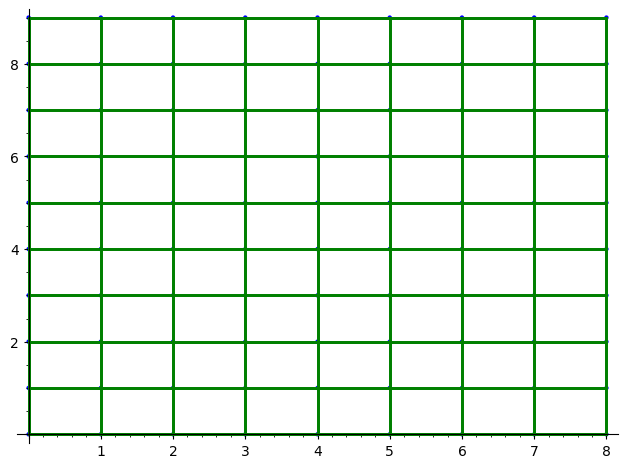

In [105]:
labyrinthe.afficher_graphe()

### Mesure des performances

au fur et a mesure des implémentations, nous allons vérifier si les performances sont accrues

In [80]:
%timeit labyrinthe.generer_connexe()

11.4 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
